<a href="https://colab.research.google.com/github/Kuntal-9933/deep_learning_tuts/blob/main/deep_learning_lec_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Neural Network to figure out hand written digits dataset.

In [ ]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
(x_train,y_train) , (x_test,y_test)  = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
len(x_test)

10000

In [ ]:
print(f"train_size : test_size = ({int(len(x_train)/len(x_test))}:1)")

train_size : test_size = (6:1)


<Figure size 432x288 with 0 Axes>

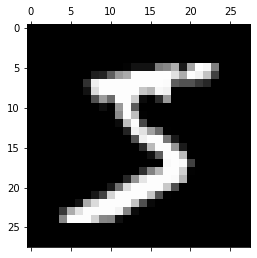

In [ ]:
%matplotlib inline
plt.gray()
plt.matshow(x_train[0])

In [ ]:
x_train.shape

(60000, 28, 28)

### Now we want to convert the 28*28  grid whuich is a 2D array to 1D array wo we are going to use the reshape function.

As all the grid values are in between 0 to 255 so we are going to scale the,m by dividing them by 255

In [ ]:
x_train=x_train/255
x_test=x_test/255

In [ ]:
x_train_flat= x_train.reshape(len(x_train),28*28)
x_test_flat=x_test.reshape(len(x_test),28*28)

In [ ]:
x_train_flat.shape

(60000, 784)

### creating our keras model

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,), activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train_flat,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.4655 - accuracy: 0.8789
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3035 - accuracy: 0.9158
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2831 - accuracy: 0.9209
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2733 - accuracy: 0.9242
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2665 - accuracy: 0.9264


In [ ]:
model.evaluate(x_test_flat,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2682 - accuracy: 0.9257


[0.26819905638694763, 0.9257000088691711]

In [ ]:
y_pred=model.predict(x_test_flat)

<Figure size 432x288 with 0 Axes>

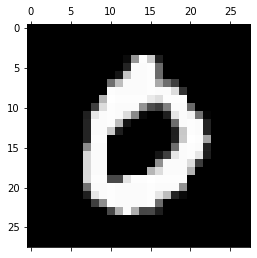

In [ ]:
%matplotlib inline
plt.gray()
plt.matshow(x_test[3])

In [ ]:
y_pred[3]

array([9.9963540e-01, 2.7744122e-08, 5.7506621e-02, 2.9294193e-03,
       6.4663873e-05, 9.4413459e-02, 8.9726537e-02, 1.1873871e-02,
       1.7998427e-02, 1.4874250e-02], dtype=float32)

In [ ]:
np.argmax(y_pred[3])

0

In [ ]:
y_pred_label=[np.argmax(i) for i in y_pred]
y_pred_label[:8]

[7, 2, 1, 0, 4, 1, 4, 9]

In [ ]:
cm=tf.math.confusion_matrix(labels=y_test , predictions=y_pred_label)

Text(69.0, 0.5, 'Actual')

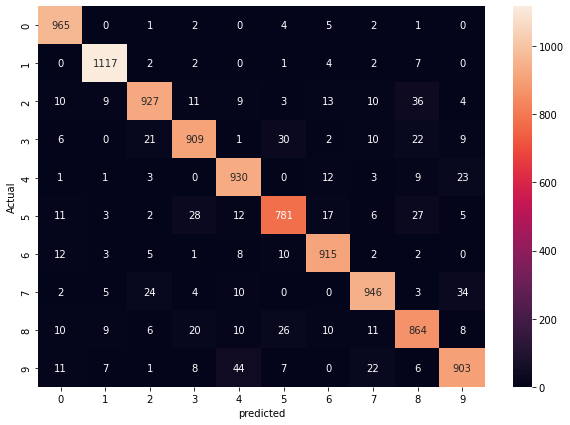

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True ,fmt='d')
plt.xlabel('predicted')
plt.ylabel("Actual")

### updated code with hidden layer

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(250,input_shape=(784,), activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train_flat,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2223 - accuracy: 0.9346
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0911 - accuracy: 0.9719
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0606 - accuracy: 0.9814
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0445 - accuracy: 0.9861
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0363 - accuracy: 0.9883


In [ ]:
model.evaluate(x_test_flat,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0656 - accuracy: 0.9821


[0.06560678780078888, 0.9821000099182129]

In [ ]:
y_pred_new =model.predict(x_test_flat)

y_pred_new_label=[np.argmax(i) for i in y_pred_new]

y_pred_new_label[:8]

[7, 2, 1, 0, 4, 1, 4, 9]

In [ ]:
cm_new=tf.math.confusion_matrix(labels=y_test , predictions=y_pred_new_label)

Text(69.0, 0.5, 'Actual')

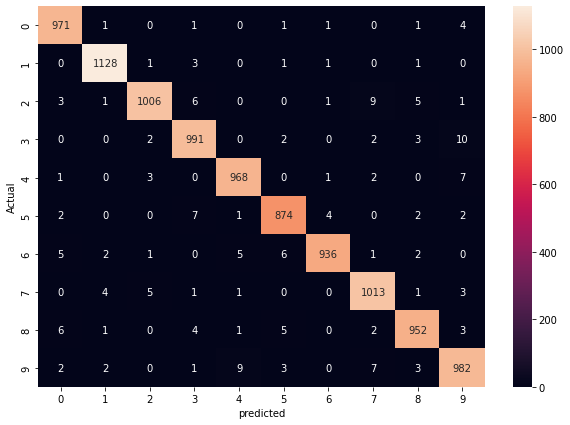

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(cm_new, annot=True ,fmt='d')
plt.xlabel('predicted')
plt.ylabel("Actual")